https://www.kaggle.com/c/titanic

15 April 1912 Titanic gemi kazası ile ilgili veri seti

2224 kişiden 1502 kişi kazada ölmüş (yolcu ve görevli)

titanic.csv içinde

Survival (hayatta kalıp kalmama durumu)--> bağımlı değişken (hedef değişken)
0 = hayatta kalmadı
1 = hayatta kaldı

Bağımsız Değişkenler
1. Sex (cinsiyet)
2. Age  (yaş)
3. SibSp(kardeşler(siblings), karı koca(spouse))
4. Parch (parent, children)
5. Ticket ( bilet numarası)
6. Fare (yolcu ücreti)
7. Cabin(kabin numarası)
8. Embarked(bindiği liman -->  C:Cherbourg, Q: Queenstown, S: Southampton) 
9. Pclass (biletin sınıfı)


In [76]:
import pandas as pd

In [77]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
# satır ve sutun sayısı : 891 satır ve 12 sutun
data.shape

(891, 12)

In [79]:
#null değerleri ve suutnların tiplerini öğrenmek için
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


select_dtypes() metodu include parametresi ile kullanılır. İstenen tipteki sutunları getirir.

In [80]:
#sayısal veri tipindeki sutunlar
data_types=["int16","int32","int64","float16","float32","float64"]
numeric=list(data.select_dtypes(include=data_types))  #select_dtypes metodu include parametresi ile kullanılır. istenen tipteki
data=data[numeric]     #parametreleri getirir.
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Feauture Selection(Öznitelik Seçimi) yöntemleri

1. filter metod
2. wapper metod
3. embeded metod

Örneğin : 1000 tane sütunumuz var. Bunların hepsini kullanamayız. Bizim için en yararlı sütunlar hangileri sorusuna cevap için feature selection yapılıyor.

In [81]:
#PassengerId ve Parch sutunlarını sil 
data.drop(columns=["PassengerId","Parch"],inplace=True)  #inplace ile drop edilen son hali kalıcı hale getir.
data.head()

,Survived,Pclass,Age,SibSp,Fare
0,0,3,22.0,1,7.2500
1,1,1,38.0,1,71.2833
2,1,3,26.0,0,7.9250
3,1,1,35.0,1,53.1000
4,0,3,35.0,0,8.0500


In [82]:
data.shape

(891, 5)

In [83]:
#her kolondaki boş (NAN) sayısı
data.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Fare          0
dtype: int64

In [84]:
# değerlerin % kaçı boş
data.isnull().mean()

Survived    0.000000
Pclass      0.000000
Age         0.198653
SibSp       0.000000
Fare        0.000000
dtype: float64

In [85]:
import numpy as np
from sklearn.model_selection import train_test_split

# X_train = matris -> büyük harfle,  y_train = vektör -> küçük harfle
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["Survived"]), 
                                                    data.Survived, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((623, 4), (268, 4))

In [86]:
X_train.head()

,Pclass,Age,SibSp,Fare
857,1,51.0,0,26.5500
52,1,49.0,1,76.7292
386,3,1.0,5,46.9000
124,1,54.0,0,77.2875
578,3,NaN,1,14.4583


In [87]:
null_columns=[]

def findNullColumns(df):
    global null_columns
    null_columns=[]
    for col in df.columns:
        col_sum=df[col].isnull().sum()
        if col_sum!=0:
            null_columns.append(col)

In [88]:
findNullColumns(X_train)

In [89]:
null_columns

['Age']

In [90]:
def fillNullColumns(df):
    for var in null_columns:
        median = df[var].median()
        df[var+"_median"]=df[var].fillna(median)
        df[var+"_zero"]=df[var].fillna(0)

In [91]:
fillNullColumns(X_train)

In [92]:
X_train.head()

,Pclass,Age,SibSp,Fare,Age_median,Age_zero
857,1,51.0,0,26.5500,51.0,51.0
52,1,49.0,1,76.7292,49.0,49.0
386,3,1.0,5,46.9000,1.0,1.0
124,1,54.0,0,77.2875,54.0,54.0
578,3,NaN,1,14.4583,29.0,0.0


In [93]:
import matplotlib.pyplot as plt
% matplotlib inline

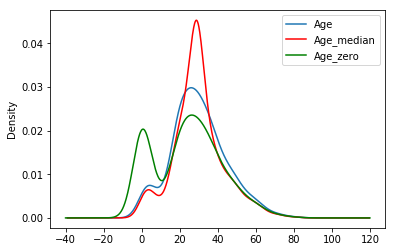

In [94]:
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
X_train.Age.plot(kind="kde",label="Age",ax=ax1)
X_train.Age_median.plot(kind="kde",label="Age_median",ax=ax1,color="red")
X_train.Age_zero.plot(kind="kde",label="Age_zero",ax=ax1,color="green")
ax1.legend()

In [95]:
print("Standart deviation for Age :", X_train.Age.std())
print("Standart deviation for Age_median :", X_train.Age_median.std())
print("Standart deviation for Age_zero :", X_train.Age_zero.std())

Standart deviation for Age : 14.506993804588443
Standart deviation for Age_median : 13.024746215318798
Standart deviation for Age_zero : 17.60095360447329


Scaling işlemini uygulayıp uygulamayacağıma karar vermek için istatistiki bilgiler için describe() metodu. (sadece dolu olan değerleri alır)

50% aynı zamanda medyan değeridir.
Scaling metodu, içerisinde Nan değeri ile çalışmaz o yüzden Age kolonunu sileceğiz ve Age_median ve Age_zero ile ayrı ayrı yapıp karşılaştıracağız.

In [96]:
X_train.describe()

,Pclass,Age,SibSp,Fare,Age_median,Age_zero
count,623.000000,502.000000,623.000000,623.000000,623.000000,623.000000
mean,2.287319,29.915339,0.531300,32.458273,29.737560,24.105136
std,0.840657,14.506994,1.162891,48.257658,13.024746,17.600954
min,1.000000,0.670000,0.000000,0.000000,0.670000,0.000000
25%,1.500000,21.000000,0.000000,7.925000,23.000000,6.000000
50%,3.000000,29.000000,0.000000,15.000000,29.000000,25.000000
75%,3.000000,38.000000,1.000000,31.387500,36.000000,36.000000
max,3.000000,80.000000,8.000000,512.329200,80.000000,80.000000


In [97]:
X_train.drop(columns=["Age_median","Age_zero"],inplace=True)

In [98]:
X_y_train=pd.concat([X_train,X_test],axis=1)
X_y_train.head()

,Pclass,Age,SibSp,Fare,Pclass,Age,SibSp,Fare
0,3.0,22.0,1.0,7.25,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.0,38.0,1.0,71.2833
2,NaN,NaN,NaN,NaN,3.0,26.0,0.0,7.9250
3,1.0,35.0,1.0,53.10,NaN,NaN,NaN,NaN
4,3.0,35.0,0.0,8.05,NaN,NaN,NaN,NaN


In [99]:
findNullColumns(X_train)
null_columns

['Age']

In [100]:
col_zero=[]
for col in X_train.columns:
    if col in null_columns:
        col_zero.append(col+"_zero")
    else:
        col_zero.append(col)

In [101]:
col_zero

['Pclass', 'Age_zero', 'SibSp', 'Fare']

In [102]:
col_median=[]
for col in X_train.columns:
    if col in null_columns:
        col_median.append(col+"_median")
    else:
        col_median.append(col)

In [103]:
col_median

['Pclass', 'Age_median', 'SibSp', 'Fare']

In [104]:
fillNullColumns(X_train)

In [105]:
X_train.head()

,Pclass,Age,SibSp,Fare,Age_median,Age_zero
857,1,51.0,0,26.5500,51.0,51.0
52,1,49.0,1,76.7292,49.0,49.0
386,3,1.0,5,46.9000,1.0,1.0
124,1,54.0,0,77.2875,54.0,54.0
578,3,NaN,1,14.4583,29.0,0.0


In [106]:
fillNullColumns(X_test)

In [109]:
X_test.head()

,Pclass,Age,SibSp,Fare,Age_median,Age_zero
495,3,NaN,0,14.4583,27.0,0.0
648,3,NaN,0,7.5500,27.0,0.0
278,3,7.0,4,29.1250,7.0,7.0
31,1,NaN,1,146.5208,27.0,0.0
255,3,29.0,0,15.2458,29.0,29.0


In [110]:
X_train_zero=X_train[col_zero]
X_train_zero.head()

,Pclass,Age_zero,SibSp,Fare
857,1,51.0,0,26.5500
52,1,49.0,1,76.7292
386,3,1.0,5,46.9000
124,1,54.0,0,77.2875
578,3,0.0,1,14.4583


In [111]:
X_train_zero.shape

(623, 4)

In [112]:
X_train_median=X_train[col_median]
X_train_median.head()

,Pclass,Age_median,SibSp,Fare
857,1,51.0,0,26.5500
52,1,49.0,1,76.7292
386,3,1.0,5,46.9000
124,1,54.0,0,77.2875
578,3,29.0,1,14.4583


In [113]:
X_train_median.shape

(623, 4)

In [115]:
X_test_zero=X_test[col_zero]
X_test_zero.head()

,Pclass,Age_zero,SibSp,Fare
495,3,0.0,0,14.4583
648,3,0.0,0,7.5500
278,3,7.0,4,29.1250
31,1,0.0,1,146.5208
255,3,29.0,0,15.2458


In [116]:
X_test_zero.shape

(268, 4)

In [117]:
X_test_median=X_test[col_median]
X_test_median.head()

,Pclass,Age_median,SibSp,Fare
495,3,27.0,0,14.4583
648,3,27.0,0,7.5500
278,3,7.0,4,29.1250
31,1,27.0,1,146.5208
255,3,29.0,0,15.2458


In [118]:
X_test_median.shape

(268, 4)

In [119]:
from sklearn.preprocessing import StandardScaler

fit --> istatistiki bilgileri hesaplamaya yarıyor. İstatistiki bilgileri X_train veri setimden aldım. X_test'deki hiçbir istatistiki değeri görmeden, X_train'in değerlerine göre X_test'i transform etmiş oldum. Eğer X_test'de de fit_transform uygularsak overfitting'e neden olur.

In [120]:
# Yaş'ın sıfır olması durumunda scale işlemi
scaler = StandardScaler()
X_train_zero=scaler.fit_transform(X_train_zero)  #X_train'de hem fit hem transform
X_test_zero=scaler.transform(X_test_zero)    #X_test'de ise sadece transform

In [121]:
X_train_zero

array([[-1.5325562 ,  1.52926229, -0.457246  , -0.12253019],
       [-1.5325562 ,  1.41554077,  0.4033711 ,  0.91812372],
       [ 0.84844757, -1.31377554,  3.8458395 ,  0.29950338],
       ...,
       [ 0.84844757, -1.37063629, -0.457246  , -0.51276504],
       [ 0.84844757,  0.67635094,  0.4033711 , -0.31228976],
       [-0.34205431,  2.04100909,  0.4033711 ,  0.13566725]])

In [122]:
X_test_zero

array([[ 0.84844757, -1.37063629, -0.457246  , -0.37329694],
       [ 0.84844757, -1.37063629, -0.457246  , -0.51656645],
       [ 0.84844757, -0.972611  ,  2.9852224 , -0.06912791],
       ...,
       [ 0.84844757,  0.16460413,  0.4033711 , -0.37338197],
       [ 0.84844757, -0.34714268, -0.457246  , -0.51769049],
       [-1.5325562 , -1.37063629, -0.457246  , -0.09824926]])

In [123]:
X_train_zero.shape

(623, 4)

In [124]:
X_test_zero.shape

(268, 4)

In [125]:
# Yaş'ın medyan değeri olması durumunda scale işlemi
scaler = StandardScaler()
X_train_median=scaler.fit_transform(X_train_median)  #X_train'de hem fit hem transform
X_test_median=scaler.transform(X_test_median)    #X_test'de ise sadece transform

In [126]:
X_train_median

array([[-1.5325562 ,  1.63377655, -0.457246  , -0.12253019],
       [-1.5325562 ,  1.48009931,  0.4033711 ,  0.91812372],
       [ 0.84844757, -2.20815449,  3.8458395 ,  0.29950338],
       ...,
       [ 0.84844757, -0.05667311, -0.457246  , -0.51276504],
       [ 0.84844757,  0.48119724,  0.4033711 , -0.31228976],
       [-0.34205431,  2.32532414,  0.4033711 ,  0.13566725]])

In [127]:
X_test_median

array([[ 0.84844757, -0.21035035, -0.457246  , -0.37329694],
       [ 0.84844757, -0.21035035, -0.457246  , -0.51656645],
       [ 0.84844757, -1.74712277,  2.9852224 , -0.06912791],
       ...,
       [ 0.84844757, -0.21035035,  0.4033711 , -0.37338197],
       [ 0.84844757, -0.90189794, -0.457246  , -0.51769049],
       [-1.5325562 , -0.21035035, -0.457246  , -0.09824926]])

In [128]:
X_train_median.shape

(623, 4)

In [129]:
X_test_median.shape

(268, 4)

### Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression

In [167]:
log =LogisticRegression(random_state=42)
log.fit(X_train_zero,y_train)  #modeli eğitiyorum
lr_predict=log.predict_proba(X_test_zero)  #sadece predict değil predict_proba kullanıldı.

In [168]:
lr_predict  # array[0] --> 0 olma olasılığı  array[1] --> 1 olma olasılığı

array([[0.6542517 , 0.3457483 ],
       [0.65983459, 0.34016541],
       [0.78542666, 0.21457334],
       [0.19140631, 0.80859369],
       [0.76762622, 0.23237378],
       [0.23701704, 0.76298296],
       [0.30202205, 0.69797795],
       [0.25876822, 0.74123178],
       [0.3187976 , 0.6812024 ],
       [0.66009278, 0.33990722],
       [0.7871515 , 0.2128485 ],
       [0.63198625, 0.36801375],
       [0.65967358, 0.34032642],
       [0.46405884, 0.53594116],
       [0.2901797 , 0.7098203 ],
       [0.71744246, 0.28255754],
       [0.75038881, 0.24961119],
       [0.54843737, 0.45156263],
       [0.79193434, 0.20806566],
       [0.66087603, 0.33912397],
       [0.53028792, 0.46971208],
       [0.23533748, 0.76466252],
       [0.65968364, 0.34031636],
       [0.23669291, 0.76330709],
       [0.74633878, 0.25366122],
       [0.3485602 , 0.6514398 ],
       [0.78232155, 0.21767845],
       [0.74775352, 0.25224648],
       [0.55093994, 0.44906006],
       [0.74290289, 0.25709711],
       [0.

In [169]:
from sklearn.metrics import roc_auc_score
print("ROC AUC score for zero : ", format(roc_auc_score(y_test,lr_predict[:,1])))

ROC AUC score for zero :  0.6988095238095238


In [170]:
log =LogisticRegression(random_state=42)
log.fit(X_train_median,y_train) 
lr_predict=log.predict_proba(X_test_median) 
print("ROC AUC score for median : ", format(roc_auc_score(y_test,lr_predict[:,1])))

ROC AUC score for median :  0.7255952380952382


### RandomForestClassifier

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
rf = RandomForestClassifier(n_estimators=100,random_state=42,max_depth=3)
rf.fit(X_train_zero,y_train)
rf_predict=rf.predict_proba(X_test_zero)
print(" RandomForestClassifier - ROC AUC score for zero : ", format(roc_auc_score(y_test,rf_predict[:,1])))

 RandomForestClassifier - ROC AUC score for zero :  0.7489583333333333


In [173]:
rf = RandomForestClassifier(n_estimators=100,random_state=42,max_depth=3)
rf.fit(X_train_median,y_train)
rf_predict=rf.predict_proba(X_test_median)
print(" RandomForestClassifier - ROC AUC score for median : ", format(roc_auc_score(y_test,rf_predict[:,1])))

 RandomForestClassifier - ROC AUC score for median :  0.7720535714285713


### Support Vector Kernel

In [175]:
from sklearn.svm import SVC

In [176]:
model = SVC(kernel="rbf",random_state=0,probability=True)  #predict_proba metodunu kullanmak için probability=True yapıyoruz.
model.fit(X_train_zero,y_train)
svc_predict= model.predict_proba(X_test_zero)
print(" SVC - ROC AUC score for zero : ", format(roc_auc_score(y_test,svc_predict[:,1])))

 SVC - ROC AUC score for zero :  0.7190476190476189


In [177]:
model = SVC(kernel="rbf",random_state=0,probability=True)  #predict_proba metodunu kullanmak için probability=True yapıyoruz.
model.fit(X_train_median,y_train)
svc_predict= model.predict_proba(X_test_median)
print(" SVC - ROC AUC score for median : ", format(roc_auc_score(y_test,svc_predict[:,1])))

 SVC - ROC AUC score for median :  0.7581547619047618


Her üç algortima için de Nan değerleri medyan ile doldurmak 0 ile doldurmağa göre avantajlı. ROC AUC değeri daha yüksek.